In [229]:
import pandas as pd
app1_df = pd.read_csv('data/app1.csv', delimiter=',')
app2_df = pd.read_csv('data/app2.csv', delimiter=',')

In [230]:
app1_df # The world in 1960

,country,population_rank_1960,gdp_capita_nominal_1960,struct_1945
0,China,1,90,3
1,India,2,82,3
2,Russia/USSR,3,991,2
3,United States,4,3007,1
4,Japan,5,479,1
5,Indonesia,6,65,3
6,Germany,7,1127,1
7,Brazil,8,210,3
8,United Kingdom,9,1381,1
9,Italy,10,804,1


In [231]:
app2_df # The world in 2018

,country,population_rank_2018,gdp_capita_nominal_2018,struct_1945
0,China,1,9771,3
1,India,2,2016,3
2,United States,3,62641,1
3,Indonesia,4,3894,3
4,Pakistan,5,1473,3
5,Brazil,6,8921,3
6,Nigeria,7,2028,3
7,Bangladesh,8,1698,3
8,Russia/USSR,9,11289,2
9,Japan,10,39287,1


In [232]:
# Merge two tables into one
merged_df = pd.merge(app1_df, app2_df, on='country', how='outer')
merged_df

,country,population_rank_1960,gdp_capita_nominal_1960,struct_1945_x,population_rank_2018,gdp_capita_nominal_2018,struct_1945_y
0,China,1.0,90.0,3.0,1.0,9771.0,3.0
1,India,2.0,82.0,3.0,2.0,2016.0,3.0
2,Russia/USSR,3.0,991.0,2.0,9.0,11289.0,2.0
3,United States,4.0,3007.0,1.0,3.0,62641.0,1.0
4,Japan,5.0,479.0,1.0,10.0,39287.0,1.0
5,Indonesia,6.0,65.0,3.0,4.0,3894.0,3.0
6,Germany,7.0,1127.0,1.0,17.0,48196.0,1.0
7,Brazil,8.0,210.0,3.0,6.0,8921.0,3.0
8,United Kingdom,9.0,1381.0,1.0,22.0,42491.0,1.0
9,Italy,10.0,804.0,1.0,23.0,34318.0,1.0


In [233]:
# Copy & remove two copies of structural positions
merged_df['struct_1945_x'] = merged_df['struct_1945_x'].fillna(merged_df['struct_1945_y'])
merged_df['struct_1945'] = merged_df['struct_1945_y'].fillna(merged_df['struct_1945_x'])

merged_cols = {'{}'.format(c): c for c in merged_df.columns[:1]}
merged_df = merged_df.drop(columns=['struct_1945_x', 'struct_1945_y'])

merged_df.loc[merged_df["struct_1945"] == 1, "struct_1945"] = "1st World"
merged_df.loc[merged_df["struct_1945"] == 2, "struct_1945"] = "2nd World"
merged_df.loc[merged_df["struct_1945"] == 3, "struct_1945"] = "3rd World"

# Make Cold War political position categorical (for labels)
cat_struct = ['1st World', '2nd World', '3rd World']
merged_df['struct_1945'] = pd.Categorical(merged_df['struct_1945'], categories=cat_struct, ordered=True)

merged_df

,country,population_rank_1960,gdp_capita_nominal_1960,population_rank_2018,gdp_capita_nominal_2018,struct_1945
0,China,1.0,90.0,1.0,9771.0,3rd World
1,India,2.0,82.0,2.0,2016.0,3rd World
2,Russia/USSR,3.0,991.0,9.0,11289.0,2nd World
3,United States,4.0,3007.0,3.0,62641.0,1st World
4,Japan,5.0,479.0,10.0,39287.0,1st World
5,Indonesia,6.0,65.0,4.0,3894.0,3rd World
6,Germany,7.0,1127.0,17.0,48196.0,1st World
7,Brazil,8.0,210.0,6.0,8921.0,3rd World
8,United Kingdom,9.0,1381.0,22.0,42491.0,1st World
9,Italy,10.0,804.0,23.0,34318.0,1st World


In [234]:
# Setting up for visualization

# Imports to visualize using plotnine
from plotnine import ggplot, aes, geom_text, geom_point, geom_segment, annotate, lims, labs, scale_color_brewer, theme_void, theme, scale_y_reverse, ggtitle, save_as_pdf_pages

# Text colors
black1 = '#252525'
black2 = '#222222'

C:\Users\Aileen\AppData\Local\Programs\Python\Python39\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_text : Removed 3 rows containing missing values.
C:\Users\Aileen\AppData\Local\Programs\Python\Python39\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_text : Removed 2 rows containing missing values.
C:\Users\Aileen\AppData\Local\Programs\Python\Python39\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 3 rows containing missing values.
C:\Users\Aileen\AppData\Local\Programs\Python\Python39\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 2 rows containing missing values.
C:\Users\Aileen\AppData\Local\Programs\Python\Python39\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_segment : Removed 5 rows containing missing values.


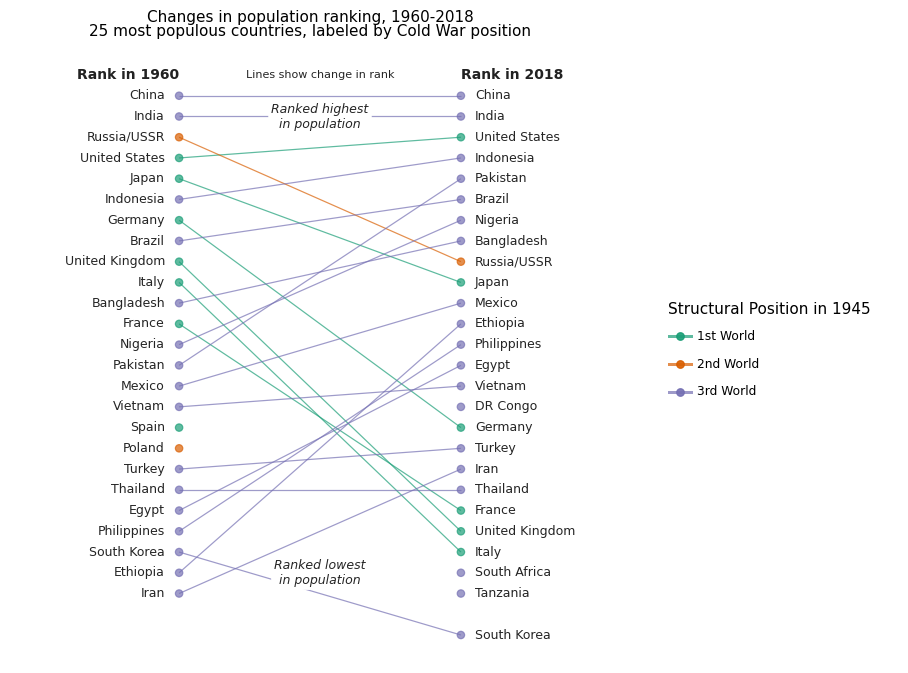

<ggplot: (117555171193)>

In [235]:
# Viz 1: Population Rank from 1960 - 2018 

# Gallery Plot
(ggplot(merged_df)
 + geom_text(aes(1, 'population_rank_1960', label='country'), nudge_x=-0.05, ha='right', size=9, color=black1)
 + geom_text(aes(2, 'population_rank_2018', label='country'), nudge_x=0.05, ha='left', size=9, color=black1)
 + geom_point(aes(1, 'population_rank_1960', color='struct_1945'), size=2.5, alpha=.7)
 + geom_point(aes(2, 'population_rank_2018', color='struct_1945'), size=2.5, alpha=.7)
 + geom_segment(aes(x=1, y='population_rank_1960', xend=2, yend='population_rank_2018', color='struct_1945'), alpha=.7)

 # Text Annotations
 + annotate('text', x=1, y=0, label='Rank in 1960', fontweight='bold', ha='right', size=10, color=black2)
 + annotate('text', x=2, y=0, label='Rank in 2018', fontweight='bold', ha='left', size=10, color=black2)
 + annotate('text', x=1.5, y=0, label='Lines show change in rank', size=8, color=black1)
 + annotate('label', x=1.5, y=2, label='Ranked highest\nin population', size=9, color=black1,
            label_size=0, fontstyle='italic')
 + annotate('label', x=1.5, y=24, label='Ranked lowest\nin population', size=9, color=black1,
            label_size=0, fontstyle='italic')

 # Prevent country names from being chopped off
 + lims(x=(0.5, 2.5))
 + labs(color='Structural Position in 1945')
  # Countries with higher population rank on top
 + scale_y_reverse()
 # Change colors
 + scale_color_brewer(type='qual', palette=2)
 # Removes all decorations
 + theme_void()
 # Changing the figure size prevents the country names from squishing up
 + theme(figure_size=(8, 8))
 # Add title
 + ggtitle("Changes in population ranking, 1960-2018\n25 most populous countries, labeled by Cold War position")
)

In [236]:
# Viz 2: Nominal GDP / Capita Rank from 1960 - 2018 

# Creating column of GDP rankings
merged_df['gdp_capita_nominal_1960_rank'] = merged_df['gdp_capita_nominal_1960'].rank(ascending=False)
merged_df['gdp_capita_nominal_2018_rank'] = merged_df['gdp_capita_nominal_2018'].rank(ascending=False)
merged_df


,country,population_rank_1960,gdp_capita_nominal_1960,population_rank_2018,gdp_capita_nominal_2018,struct_1945,gdp_capita_nominal_1960_rank,gdp_capita_nominal_2018_rank
0,China,1.0,90.0,1.0,9771.0,3rd World,19.5,9.0
1,India,2.0,82.0,2.0,2016.0,3rd World,22.5,21.0
2,Russia/USSR,3.0,991.0,9.0,11289.0,2nd World,5.0,8.0
3,United States,4.0,3007.0,3.0,62641.0,1st World,1.0,1.0
4,Japan,5.0,479.0,10.0,39287.0,1st World,9.0,5.0
5,Indonesia,6.0,65.0,4.0,3894.0,3rd World,24.0,16.0
6,Germany,7.0,1127.0,17.0,48196.0,1st World,4.0,2.0
7,Brazil,8.0,210.0,6.0,8921.0,3rd World,13.0,12.0
8,United Kingdom,9.0,1381.0,22.0,42491.0,1st World,2.0,3.0
9,Italy,10.0,804.0,23.0,34318.0,1st World,6.0,6.0


C:\Users\Aileen\AppData\Local\Programs\Python\Python39\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_text : Removed 3 rows containing missing values.
C:\Users\Aileen\AppData\Local\Programs\Python\Python39\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_text : Removed 2 rows containing missing values.
C:\Users\Aileen\AppData\Local\Programs\Python\Python39\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 3 rows containing missing values.
C:\Users\Aileen\AppData\Local\Programs\Python\Python39\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 2 rows containing missing values.
C:\Users\Aileen\AppData\Local\Programs\Python\Python39\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_segment : Removed 5 rows containing missing values.


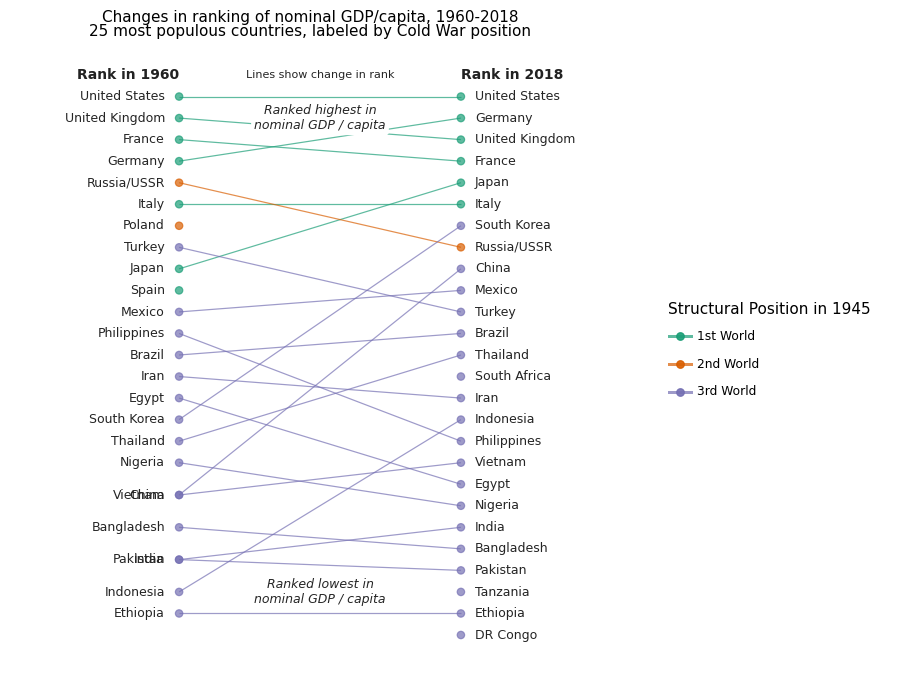

<ggplot: (117553444100)>

In [237]:
# Gallery Plot
(ggplot(merged_df)
 + geom_text(aes(1, 'gdp_capita_nominal_1960_rank', label='country'), nudge_x=-0.05, ha='right', size=9, color=black1)
 + geom_text(aes(2, 'gdp_capita_nominal_2018_rank', label='country'), nudge_x=0.05, ha='left', size=9, color=black1)
 + geom_point(aes(1, 'gdp_capita_nominal_1960_rank', color='struct_1945'), size=2.5, alpha=.7)
 + geom_point(aes(2, 'gdp_capita_nominal_2018_rank', color='struct_1945'), size=2.5, alpha=.7)
 + geom_segment(aes(x=1, y='gdp_capita_nominal_1960_rank', xend=2, yend='gdp_capita_nominal_2018_rank', color='struct_1945'), alpha=.7)

 # Text Annotations
 + annotate('text', x=1, y=0, label='Rank in 1960', fontweight='bold', ha='right', size=10, color=black2)
 + annotate('text', x=2, y=0, label='Rank in 2018', fontweight='bold', ha='left', size=10, color=black2)
 + annotate('text', x=1.5, y=0, label='Lines show change in rank', size=8, color=black1)
 + annotate('label', x=1.5, y=2, label='Ranked highest in\nnominal GDP / capita', size=9, color=black1,
            label_size=0, fontstyle='italic')
 + annotate('label', x=1.5, y=24, label='Ranked lowest in\nnominal GDP / capita', size=9, color=black1,
            label_size=0, fontstyle='italic')

 # Prevent country names from being chopped off
 + lims(x=(0.5, 2.5))
 + labs(color='Structural Position in 1945')
  # Countries with higher GDP rank on top
 + scale_y_reverse()
 # Change colors
 + scale_color_brewer(type='qual', palette=2)
 # Removes all decorations
 + theme_void()
 # Changing the figure size prevents the country names from squishing up
 + theme(figure_size=(8, 8))
 # Add title
 + ggtitle("Changes in ranking of nominal GDP/capita, 1960-2018\n25 most populous countries, labeled by Cold War position")
)

C:\Users\Aileen\AppData\Local\Programs\Python\Python39\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_text : Removed 3 rows containing missing values.
C:\Users\Aileen\AppData\Local\Programs\Python\Python39\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_text : Removed 2 rows containing missing values.
C:\Users\Aileen\AppData\Local\Programs\Python\Python39\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 3 rows containing missing values.
C:\Users\Aileen\AppData\Local\Programs\Python\Python39\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 2 rows containing missing values.
C:\Users\Aileen\AppData\Local\Programs\Python\Python39\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_segment : Removed 5 rows containing missing values.


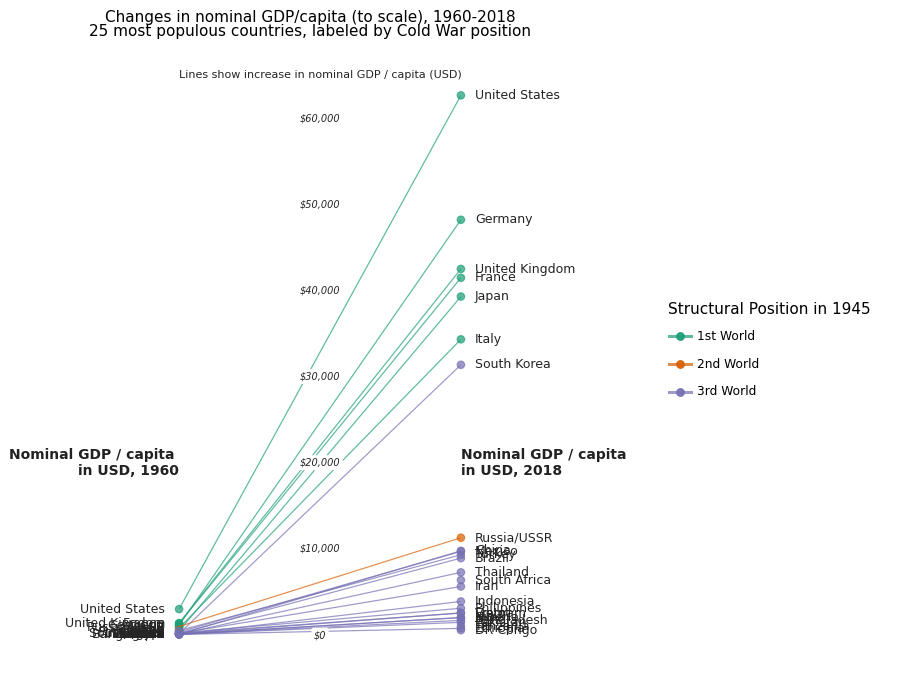

<ggplot: (117556374294)>

In [238]:
# Viz 3: Nominal GDP / Capita Rank to scale 1960 - 2018

# Gallery Plot
(ggplot(merged_df)
 + geom_text(aes(1, 'gdp_capita_nominal_1960', label='country'), nudge_x=-0.05, ha='right', size=9, color=black1)
 + geom_text(aes(2, 'gdp_capita_nominal_2018', label='country'), nudge_x=0.05, ha='left', size=9, color=black1)
 + geom_point(aes(1, 'gdp_capita_nominal_1960', color='struct_1945'), size=2.5, alpha=.7)
 + geom_point(aes(2, 'gdp_capita_nominal_2018', color='struct_1945'), size=2.5, alpha=.7)
 + geom_segment(aes(x=1, y='gdp_capita_nominal_1960', xend=2, yend='gdp_capita_nominal_2018', color='struct_1945'), alpha=.7)

 # Text Annotations
 + annotate('text', x=1, y=20000, label='Nominal GDP / capita \nin USD, 1960', fontweight='bold', ha='right', size=10, color=black2)
 + annotate('text', x=2, y=20000, label='Nominal GDP / capita \nin USD, 2018', fontweight='bold', ha='left', size=10, color=black2)
 + annotate('text', x=1.5, y=65000, label='Lines show increase in nominal GDP / capita (USD)', size=8, color=black1)
#  + annotate('label', x=1.2, y=3007, label='US, $3,007', size=7, color=black1,
#             label_size=0, fontstyle='italic')
#  + annotate('label', x=1.8, y=62641, label='US, $62,641', size=7, color=black1,
#             label_size=0, fontstyle='italic')
#  + annotate('label', x=1.2, y=1381, label='UK, $1,381', size=7, color=black1,
#             label_size=0, fontstyle='italic')
#  + annotate('label', x=1.8, y=42491, label='UK, $42,491', size=7, color=black1,
#             label_size=0, fontstyle='italic')
#  + annotate('label', x=1.2, y=991, label='Soviet Union, $991', size=7, color=black1,
#             label_size=0, fontstyle='italic')
#  + annotate('label', x=1.8, y=11289, label='Russia, $11,289', size=7, color=black1,
#             label_size=0, fontstyle='italic')
#  + annotate('label', x=1.2, y=65, label='Indonesia, $65', size=7, color=black1,
#             label_size=0, fontstyle='italic')
#  + annotate('label', x=1.8, y=3894, label='Indonesia, $3,894', size=7, color=black1,
#             label_size=0, fontstyle='italic')
 + annotate('label', x=1.5, y=0, label='$0', size=7, color=black1,
            label_size=0, fontstyle='italic')
 + annotate('label', x=1.5, y=10000, label='$10,000', size=7, color=black1,
            label_size=0, fontstyle='italic')
 + annotate('label', x=1.5, y=20000, label='$20,000', size=7, color=black1,
            label_size=0, fontstyle='italic')
 + annotate('label', x=1.5, y=30000, label='$30,000', size=7, color=black1,
            label_size=0, fontstyle='italic')
 + annotate('label', x=1.5, y=40000, label='$40,000', size=7, color=black1,
            label_size=0, fontstyle='italic')
 + annotate('label', x=1.5, y=50000, label='$50,000', size=7, color=black1,
            label_size=0, fontstyle='italic')
 + annotate('label', x=1.5, y=60000, label='$60,000', size=7, color=black1,
            label_size=0, fontstyle='italic')

 # Prevent country names from being chopped off
 + lims(x=(0.5, 2.5))
 + labs(color='Structural Position in 1945')
 # Change colors
 + scale_color_brewer(type='qual', palette=2)
 # Removes all decorations
 + theme_void()
 # Changing the figure size prevents the country names from squishing up
 + theme(figure_size=(8, 8))
 # Add title
 + ggtitle("Changes in nominal GDP/capita (to scale), 1960-2018\n25 most populous countries, labeled by Cold War position")
)
